In [7]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [8]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_pattern"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_abrupt4xCO2_diff_atl3_pattern_mon.nc',
 'PMIP4_abrupt4xCO2_diff_atl3_pattern_mon.nc',
 'PMIP3_1pctCO2_diff_atl3_pattern_mon.nc',
 'PMIP3_lig127k_diff_atl3_pattern_mon.nc',
 'PMIP4_lig127k_diff_atl3_pattern_mon.nc',
 'PMIP4_lgm_diff_atl3_pattern_mon.nc',
 'PMIP4_1pctCO2_diff_atl3_pattern_mon.nc',
 'PMIP4_midHolocene_diff_atl3_pattern_mon.nc',
 'PMIP3_midHolocene_diff_atl3_pattern_mon.nc',
 'PMIP4_piControl_diff_atl3_pattern_mon.nc',
 'PMIP4_historical_diff_atl3_pattern_mon.nc',
 'PMIP3_piControl_diff_atl3_pattern_mon.nc',
 'PMIP3_lgm_diff_atl3_pattern_mon.nc']

In [9]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-0.5,0.5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.68)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in SST Anomaly ($^\circ$C / $^\circ$C)', size=14)  
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.01)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: 

masked_array(
  data=[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00389293, -0.00383355, -0.00379946, ..., -0.00405139,
         -0.00396786, -0.00389293],
        [-0.00416225, -0.00413795, -0.00413625, ..., -0.00428854,
         -0.00421624, -0.00416225],
        [-0.00435836, -0.00438878, -0.00442432, ..., -0.00441938,
         -0.00437111, -0.00435836]],
  mask=False,
  fill_value=1e+20)

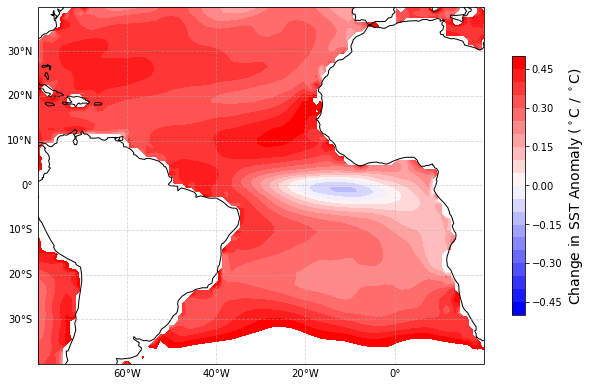

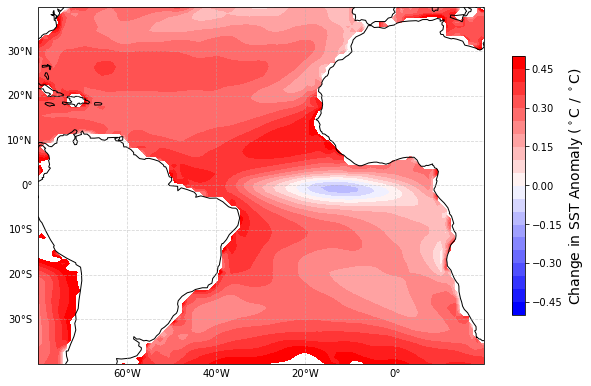

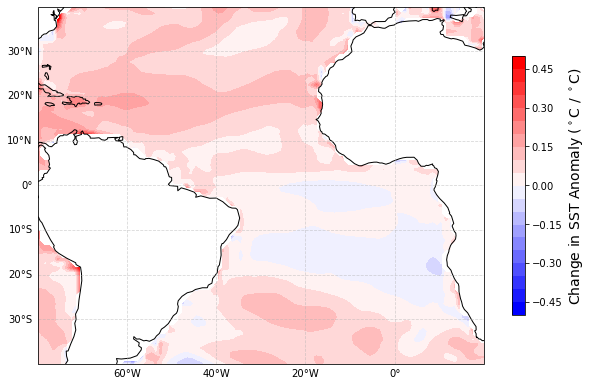

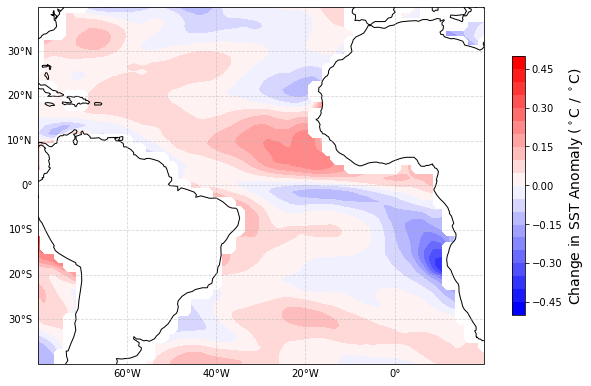

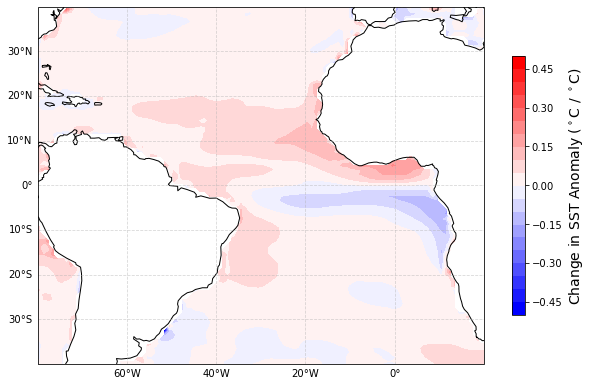

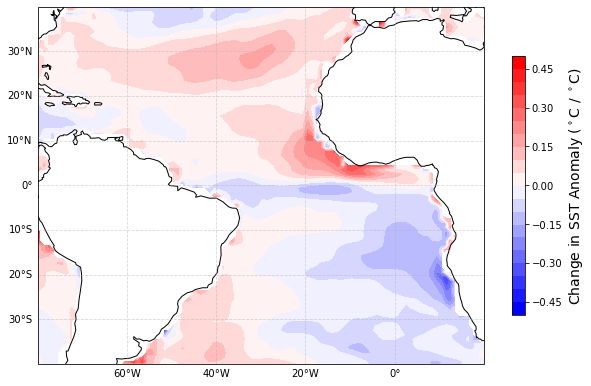

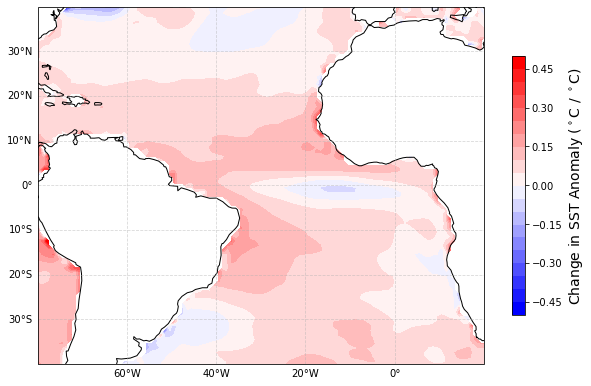

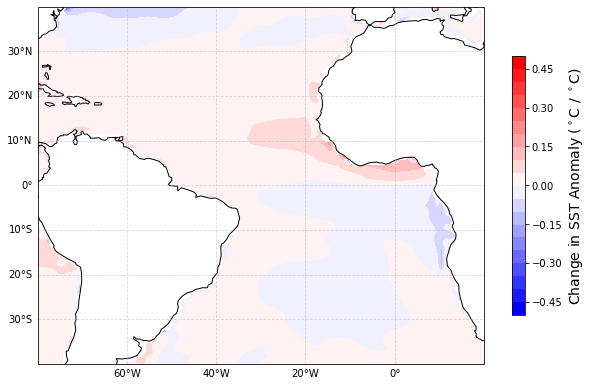

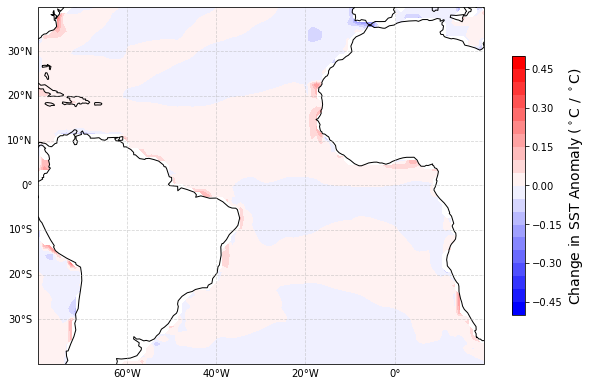

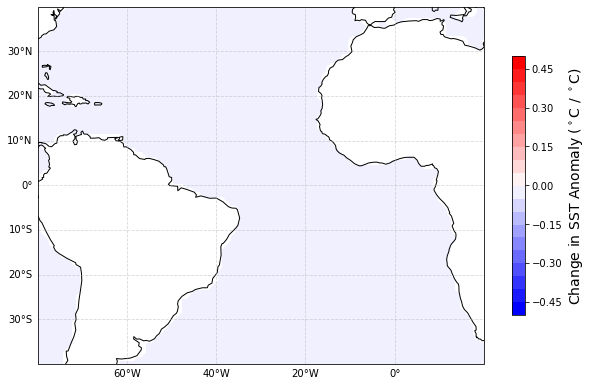

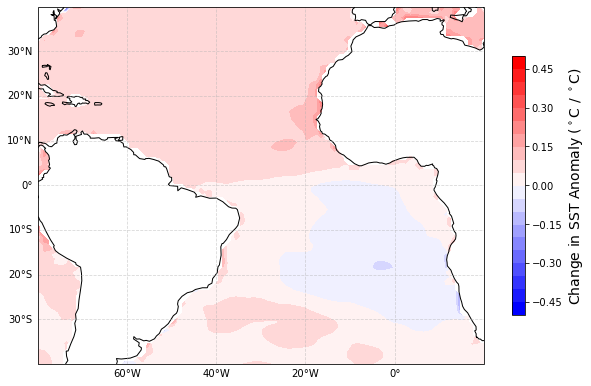

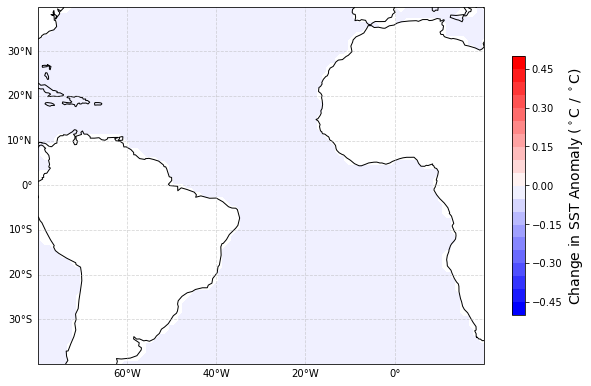

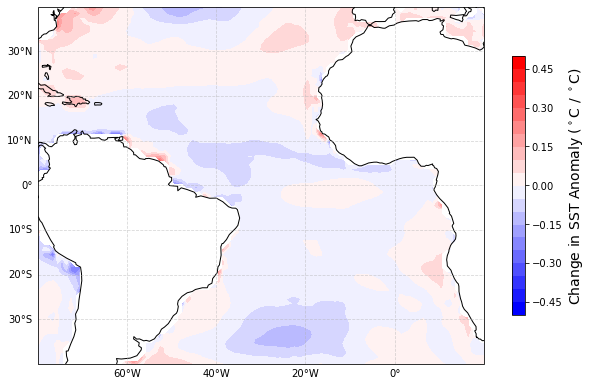

In [10]:
#open datasets
variable_name= 'atl3_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_pattern/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_atl3_pattern_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [14]:
#read all diff atl3 pr anomaly (precipitation) files 

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_pr"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_1pctCO2_diff_atl3_pr_regression_mon.nc',
 'PMIP4_abrupt4xCO2_diff_atl3_pr_regression_mon.nc',
 'PMIP4_historical_diff_atl3_pr_regression_mon.nc',
 'PMIP3_midHolocene_diff_atl3_pr_regression_mon.nc',
 'PMIP4_lig127k_diff_atl3_pr_regression_mon.nc',
 'PMIP3_lgm_diff_atl3_pr_regression_mon.nc',
 'PMIP3_abrupt4xCO2_diff_atl3_pr_regression_mon.nc',
 'PMIP4_piControl_diff_atl3_pr_regression_mon.nc',
 'PMIP3_lig127k_diff_atl3_pr_regression_mon.nc',
 'PMIP3_piControl_diff_atl3_pr_regression_mon.nc',
 'PMIP4_midHolocene_diff_atl3_pr_regression_mon.nc',
 'PMIP4_lgm_diff_atl3_pr_regression_mon.nc',
 'PMIP4_1pctCO2_diff_atl3_pr_regression_mon.nc']

In [15]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-1,1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.68)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=13)     
    plt.savefig(filename,bbox_inches='tight', pad_inches = 0.01)


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: 

masked_array(
  data=[[0.00280019, 0.00278222, 0.00278097, ..., 0.00284111, 0.00282048,
         0.00280019],
        [0.00533594, 0.00520191, 0.00505251, ..., 0.00549405, 0.00543194,
         0.00533594],
        [0.00722169, 0.00696341, 0.0066296 , ..., 0.00731195, 0.00733657,
         0.00722169],
        ...,
        [0.03046298, 0.03132224, 0.03207295, ..., 0.03268554, 0.03087734,
         0.03046298],
        [0.03126329, 0.0316841 , 0.03187344, ..., 0.0321698 , 0.03141456,
         0.03126329],
        [0.03033792, 0.03038576, 0.03035415, ..., 0.0307063 , 0.03044646,
         0.03033792]],
  mask=False,
  fill_value=1e+20)

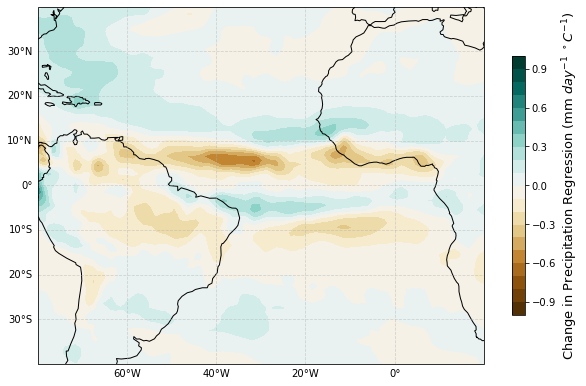

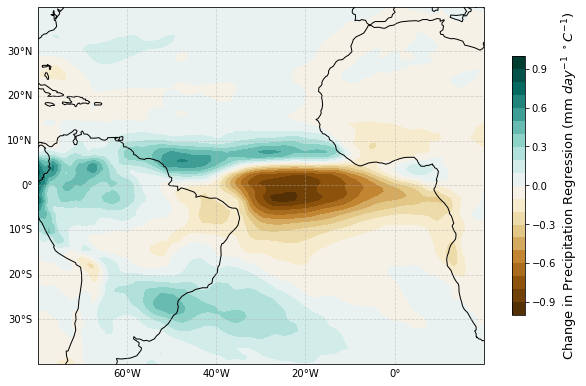

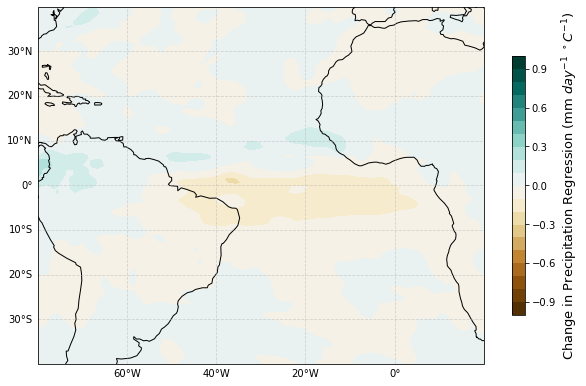

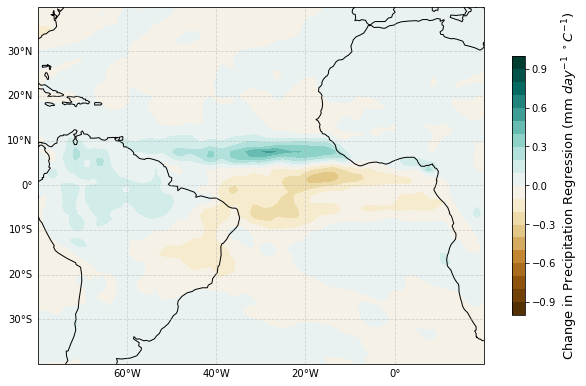

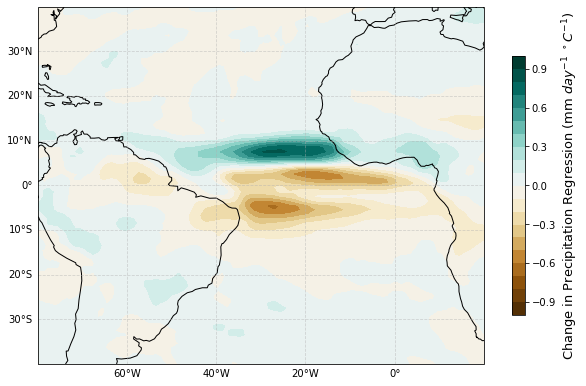

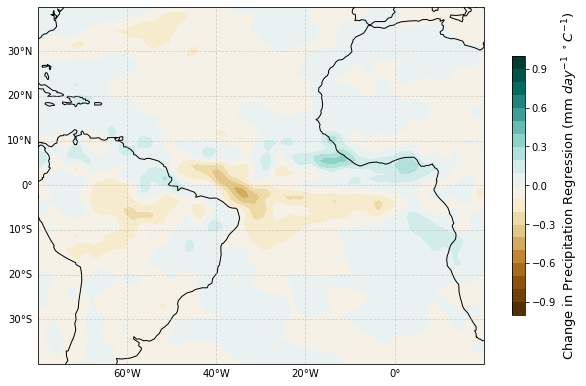

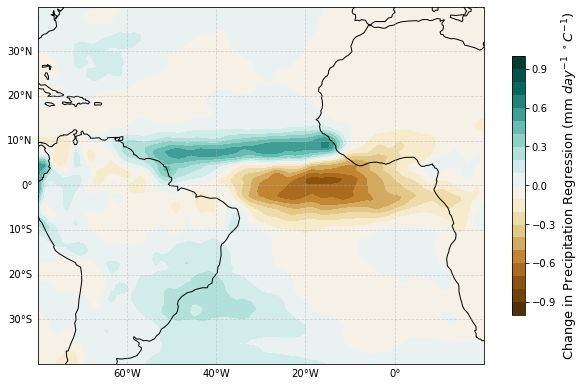

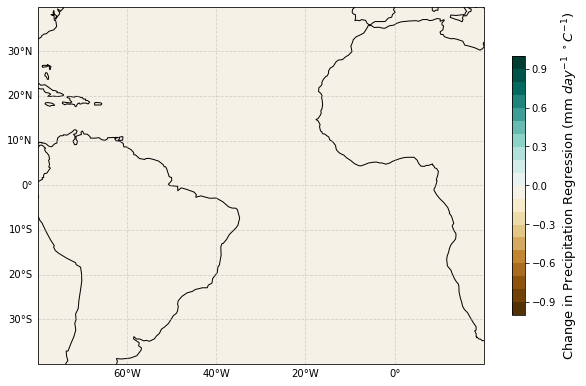

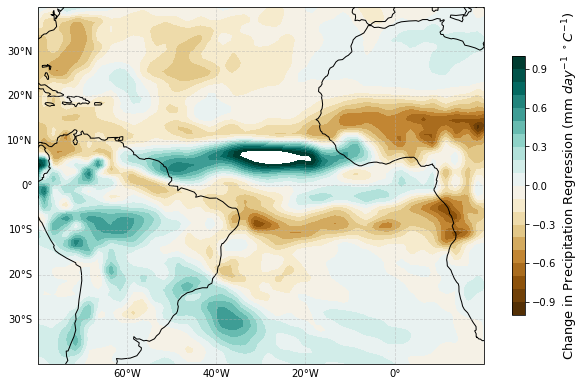

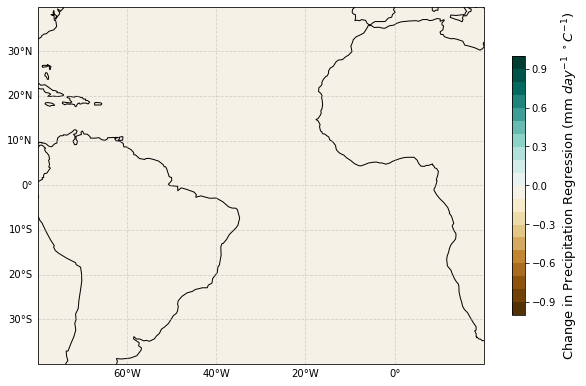

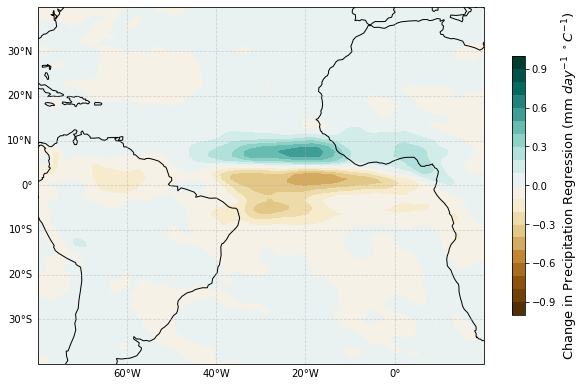

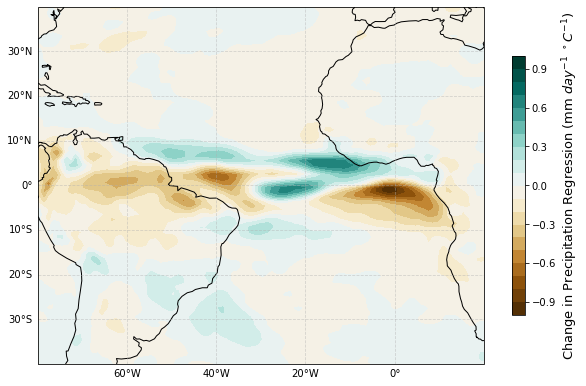

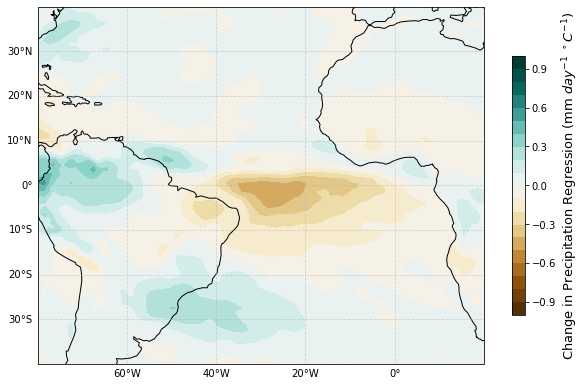

In [16]:
#open datasets
variable_name= 'atl3_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_pr/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_atl3_pr_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot


In [8]:
#read all diff atl3 tas (two metres above surface) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_tas"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_lgm_diff_atl3_tas_regression_mon.nc',
 'PMIP4_midHolocene_diff_atl3_tas_regression_mon.nc',
 'PMIP4_abrupt4xCO2_diff_atl3_tas_regression_mon.nc',
 'PMIP4_historical_diff_atl3_tas_regression_mon.nc',
 'PMIP3_lgm_diff_atl3_tas_regression_mon.nc',
 'PMIP3_1pctCO2_diff_atl3_tas_regression_mon.nc',
 'PMIP3_midHolocene_diff_atl3_tas_regression_mon.nc',
 'PMIP3_abrupt4xCO2_diff_atl3_tas_regression_mon.nc',
 'PMIP4_1pctCO2_diff_atl3_tas_regression_mon.nc',
 'PMIP4_piControl_diff_atl3_tas_regression_mon.nc',
 'PMIP3_piControl_diff_atl3_tas_regression_mon.nc']

In [9]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.4,1.4]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, 1.0225, filename, va='bottom', ha='center', 
        rotation='horizontal', rotation_mode='anchor', fontweight='bold', fontsize='14',
        transform=ax.transAxes)
    ax.text(0.5, -0.25, 'ATL3 TAS Anomaly ($^\circ$C)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
  mask=False,
  fill_value=1e+20)

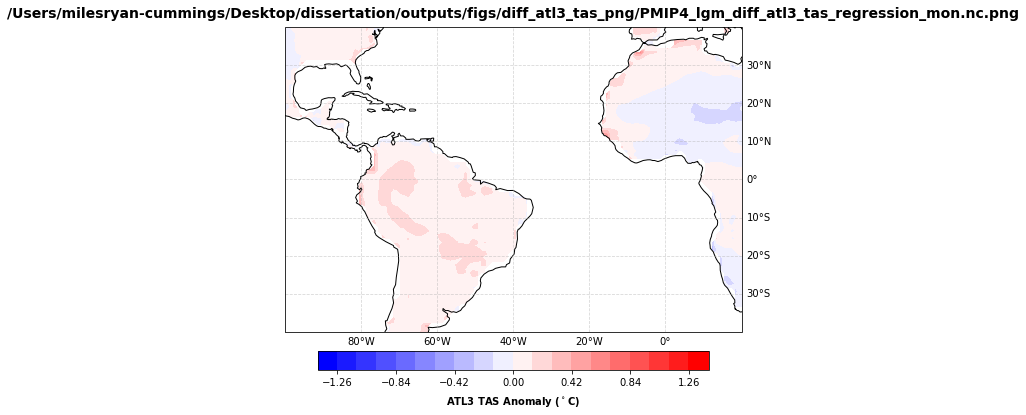

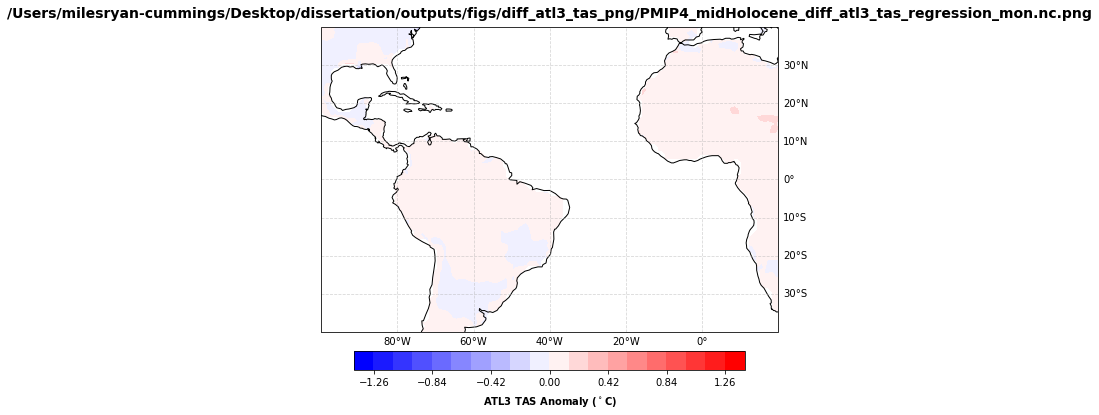

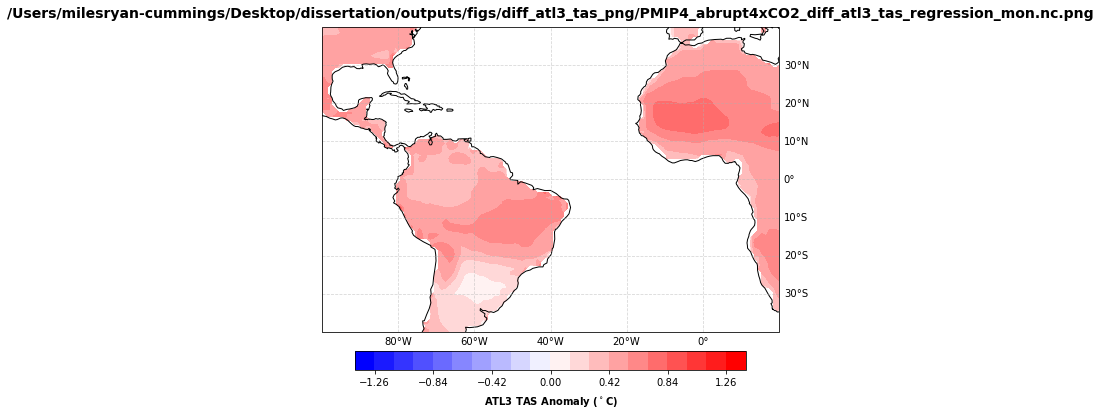

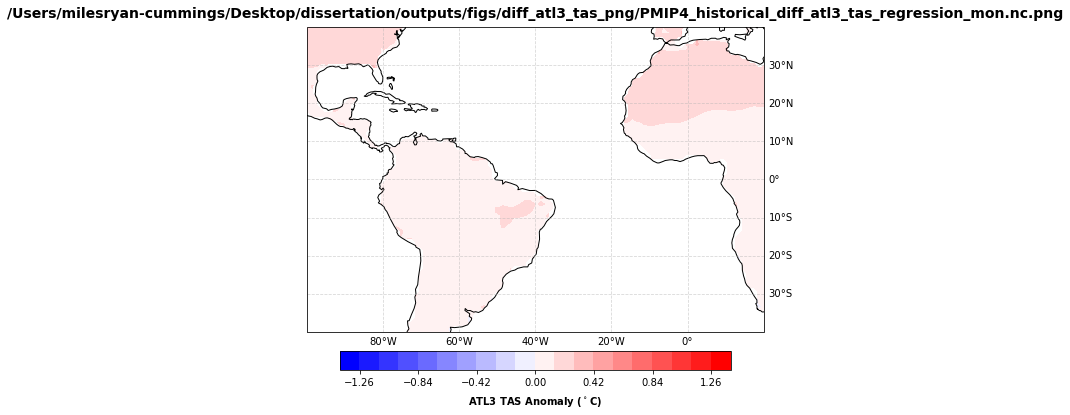

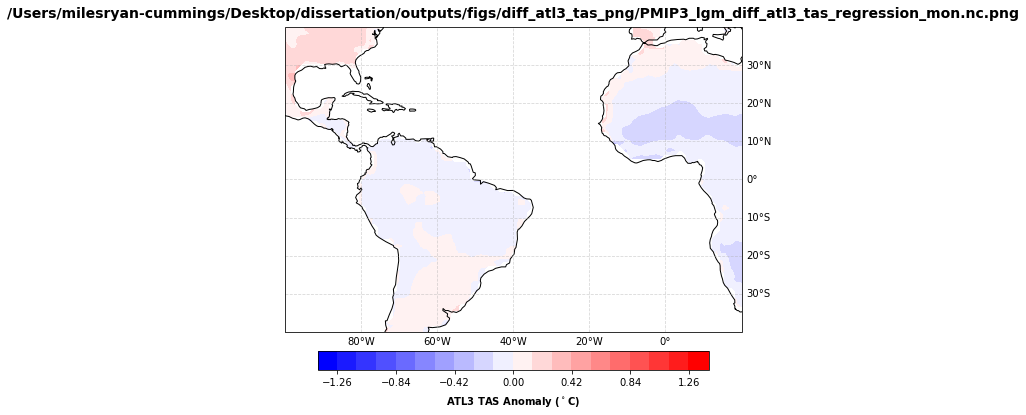

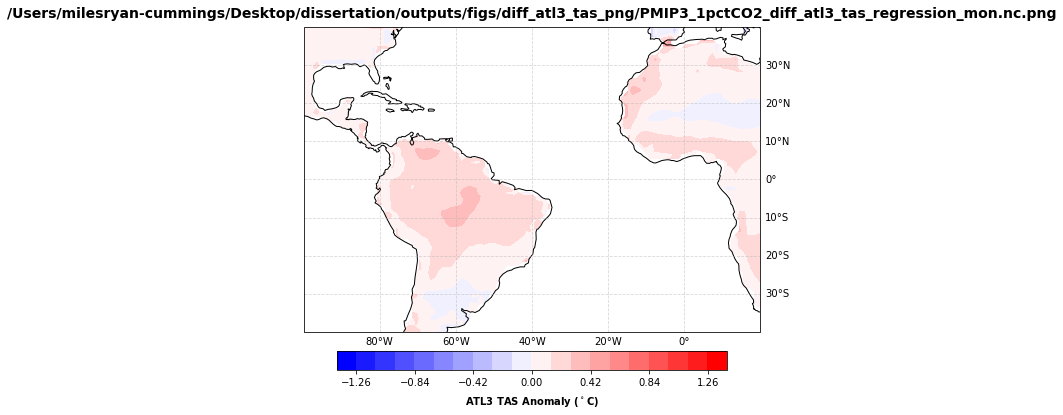

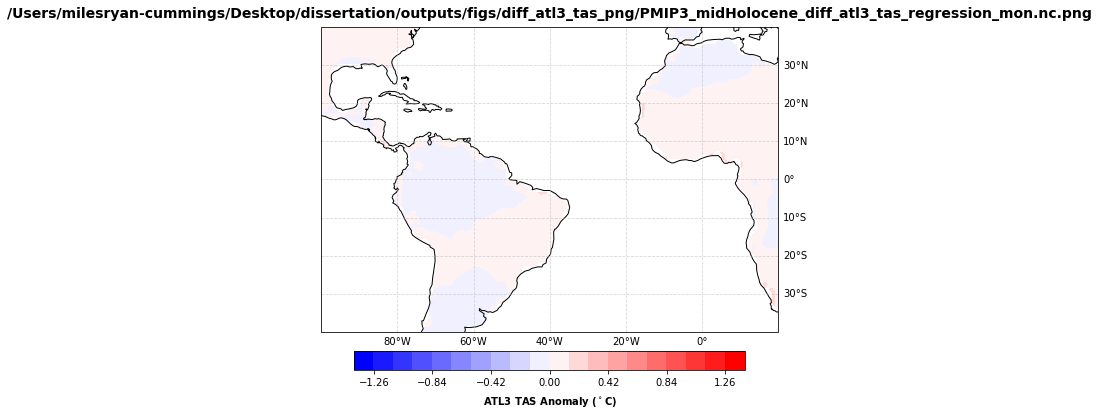

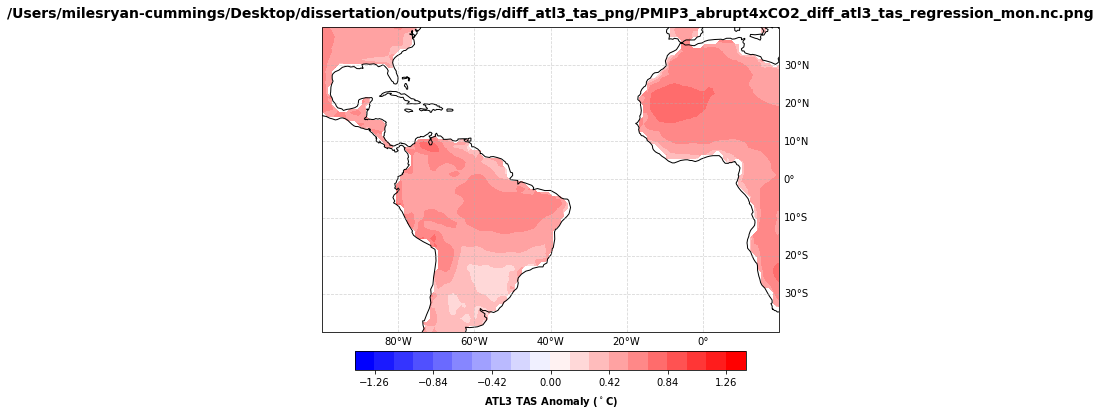

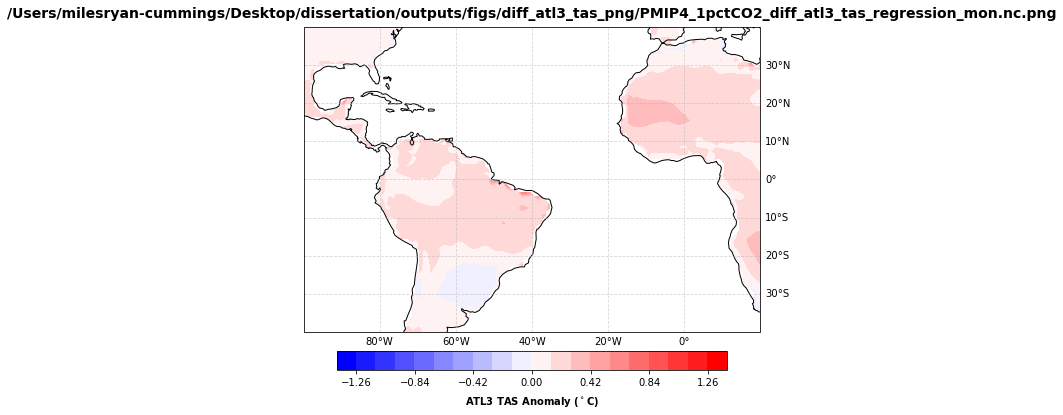

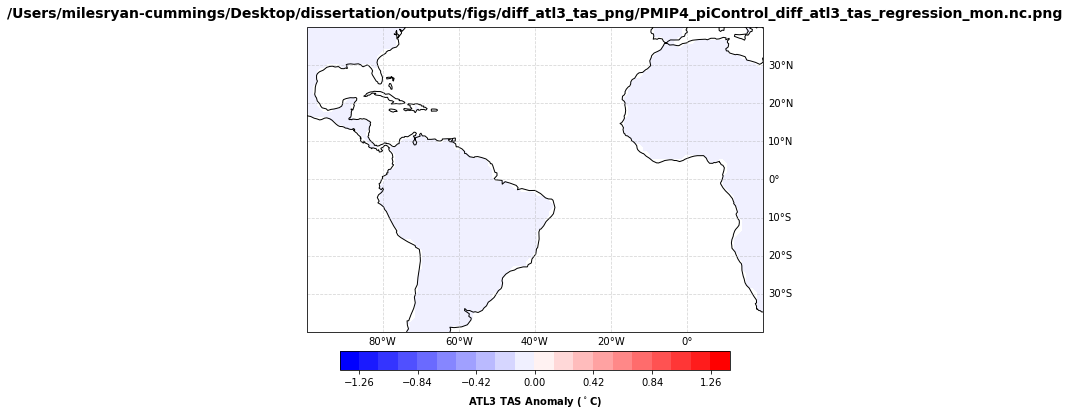

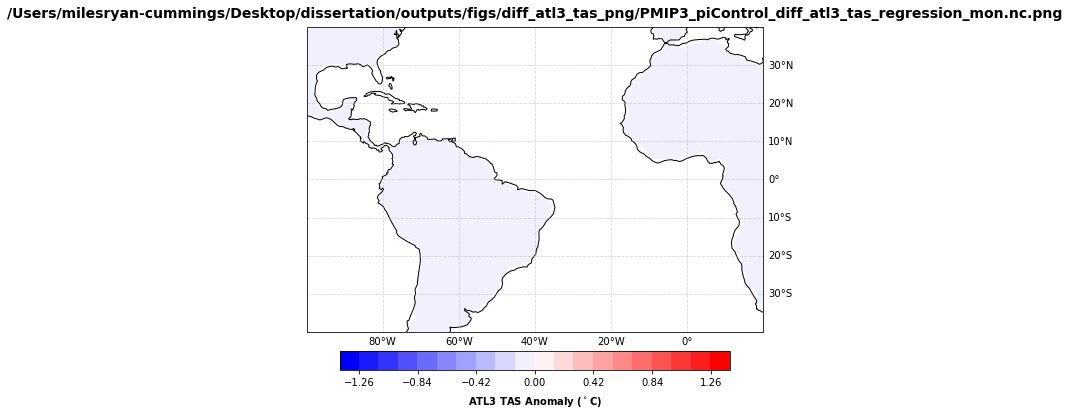

In [10]:
#open datasets
variable_name= 'atl3_tas_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_atl3_tas/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_atl3_tas_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot